# Age, Cholesterol, Blood Pressure, and Chest Pain in Determining Heart Disease

Andy Hong, Celine Li, Jason Shi, Ibrahim Saeed

# Introduction

Heart disease is the one of the leading causes of death for people in Canada, with 1 in 12 Canadian adults living with diagnosed heart disease. There are a number of factors that contribute to heart disease, the main ones being high blood pressure, high cholesterol levels, and age. Symptoms can vary between the type of heart disease and sex, but the most common symptoms include chest pain/tightness, shortness of breath, and feeling light headed and dizzy. Due to the commonality of heart disease, understanding the relationship between different factors can help people maintain a healthy cardiovascular system and decrease their chances of having heart problems.

Using the Heart Disease dataset and the Cleveland database, our goal is to predict if a patient with certain factors will have a higher chance of having heart disease. 
This dataset includes the following columns:

1. age: age
2. sex: sex (1 = male, 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure in mmHg
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: whether exercise induced angina (1 = True, 0 = False)
10. oldpeak: ST depression induced by exercise, relative to rest
11. slope: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. ca: number of major vessels (0-3) coloured by flourosopy
13. thal: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. num: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)


The variables we are using will be age, cholesterol level, resting blood pressure, chestpain, and num in order to identity diagnosis. Using these variables, we can classify whether or not that patient has heart disease by answering the following question using a K-Nearest Neighbours algorithmn

Is a patient more prone to heart disease, based on age, cholesterol levels, chest pain, and blood pressure?


# Methods

# Preliminary Data Anylsis

1. 
 
# Predictor Variable Selection Analysis

# Choosing best K-value for KNN Classifier

    include points about visualizing our k value
    
# Testing the KNN Classifier using the proven K value
    - Using the best K value that was proven above, we will apply the new KNN Model and recipe onto the training set


# Preliminary Data Analysis

In [1]:
# Load Packages
library(tidyverse)
library(repr)
library(tidymodels)
library(infer)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

__Importing Dataset from website__

In the code below, we can prove that the dataset can be read from the web. We will be naming the dataset "heart_data". 


In [2]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)
head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


_Figure 1_

__Cleaning and Tidying Data__
We notice that there are no column names for the data set thus we will need to add column names based on what each column represents.

In [3]:
names <- c("age","sex","cp","trestbps",
           "chol","fbs","restecg","thalach",
           "exang","oldpeak","slope",
           "ca","thal","num")

colnames(heart_data) <- names
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


_Figure 2_

Note that at the moment many column names cannot be easily understood at first glance, but for this analysis we are only interested in the variables age, chestpain type, resting blood presssure, cholesterol level, and if a patient has heart diesease or not. Therefore, let's select for the columns we are interested in and tidy it up. 

In [4]:
heart_data_select <- select(heart_data, age, cp, trestbps, chol, num)
slice(heart_data_select,1:5)


age,cp,trestbps,chol,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,145,233,0
67,4,160,286,2
67,4,120,229,1
37,3,130,250,0
41,2,130,204,0


_Figure 3_
Using the slice function, we see that the data is tidy as each column is of only 1 variable, each row is one unique obsevation and each cell only contains one value. 

In [5]:
sum(is.na(heart_data_select))

[1] 0

Using the slice function, we see that the data is tidy as each column is of only 1 variable, each row is one unique obsevation and each cell only contains one value. To check if there are any missing values, we can inbed the is.na() function into the sum() function. 

__Seperating data into Training and Testing Sets__

Now, let's serperate our training data from the testing data and summarize the training idea to get a good idea of what we are working with. To make sure the results are reproducible, a seed wll be set as well. 

In [6]:
#splitting dataframe into training, testing datasets
set.seed(1)
heart_clean <- mutate(heart_data, 
                          age = as.numeric(age), cp = as.numeric(cp), 
                          chol = as.numeric(chol), trestbps = as.numeric(trestbps)) %>%
                          mutate(diag = ifelse(is.na(num), NA, (num > 0))) 

heart_split <- initial_split(heart_clean, prop = 3/4, strata = num)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)


We then __summarize__ this data into their respective min, mean, and max seperated by their diagnosis

In [7]:
#summarizing training data into a table and getting mean, min, max
heart_summarized <- heart_training %>%
group_by(diag) %>%
summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
          min_cp  = min(cp), max_cp = max(cp), mean_cp = mean(cp),
          min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),
          min_trestbps = min(trestbps), max_trestbps = max(trestbps), 
                             mean_trestbps = mean(trestbps), no_patients = n())
heart_summarized
          
          


diag,min_age,max_age,mean_age,min_cp,max_cp,mean_cp,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,no_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.68548,1,4,2.774194,126,564,244.2903,94,180,129.7339,124
TRUE,35,77,56.48039,1,4,3.578431,131,409,249.3627,100,192,133.9020,102


_Figure 4_

In Figure 4 we see that the min, mean, and max values for all Age, Chest pain, Cholesteral, and Blood Pressure were all greater for the TRUE group compared to the FALSE group. We can predict from this that those with heart disease were generally older, with more chest pain, and high cholesteral and blood pressure levels.

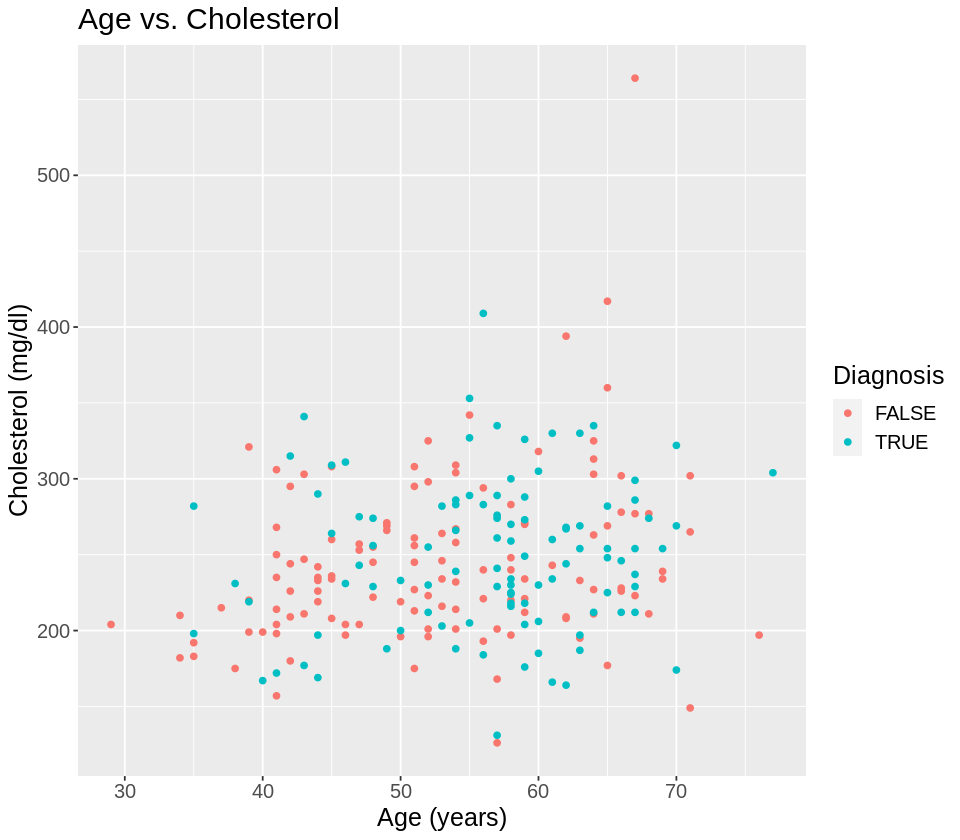

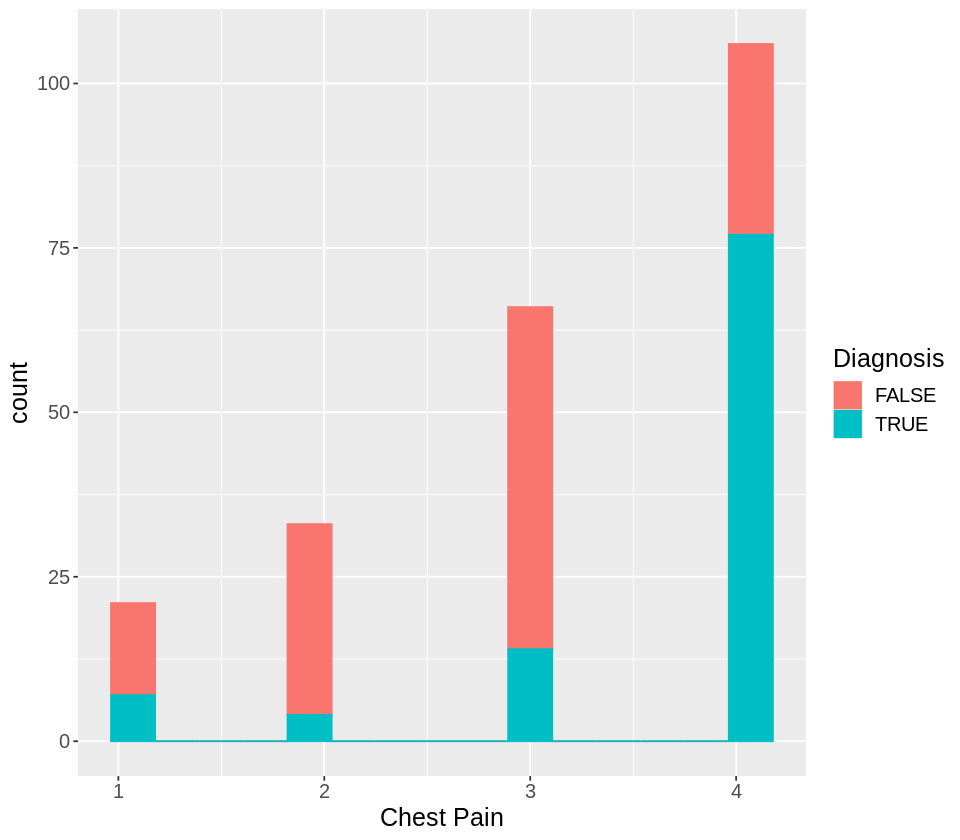

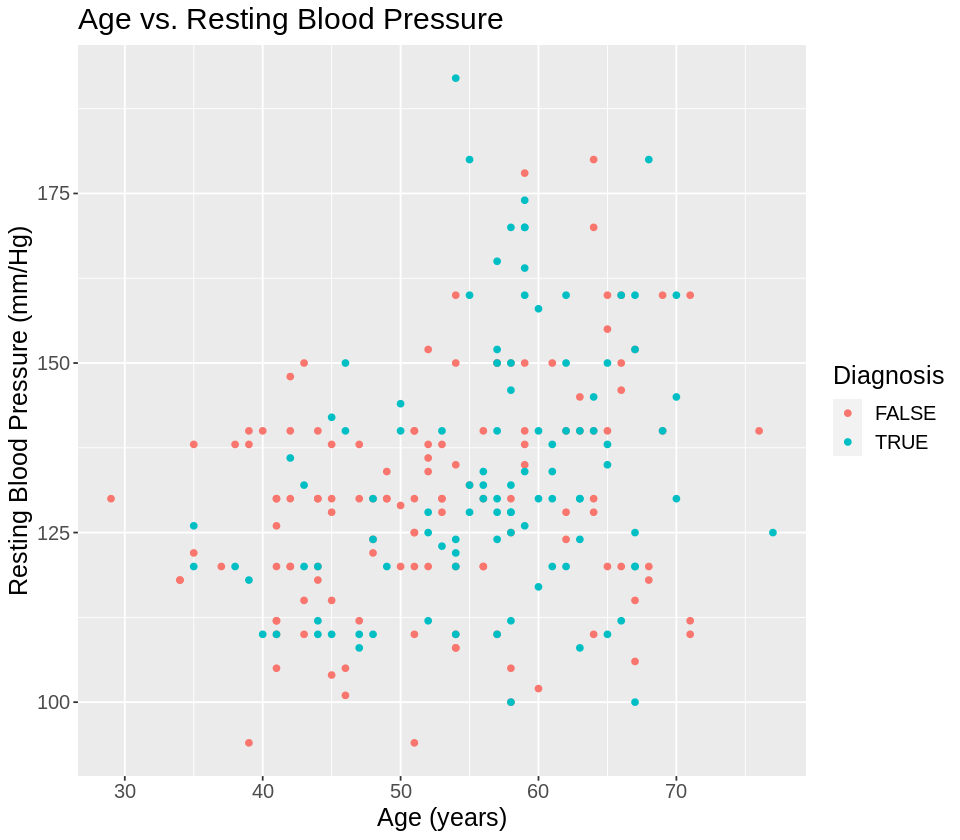

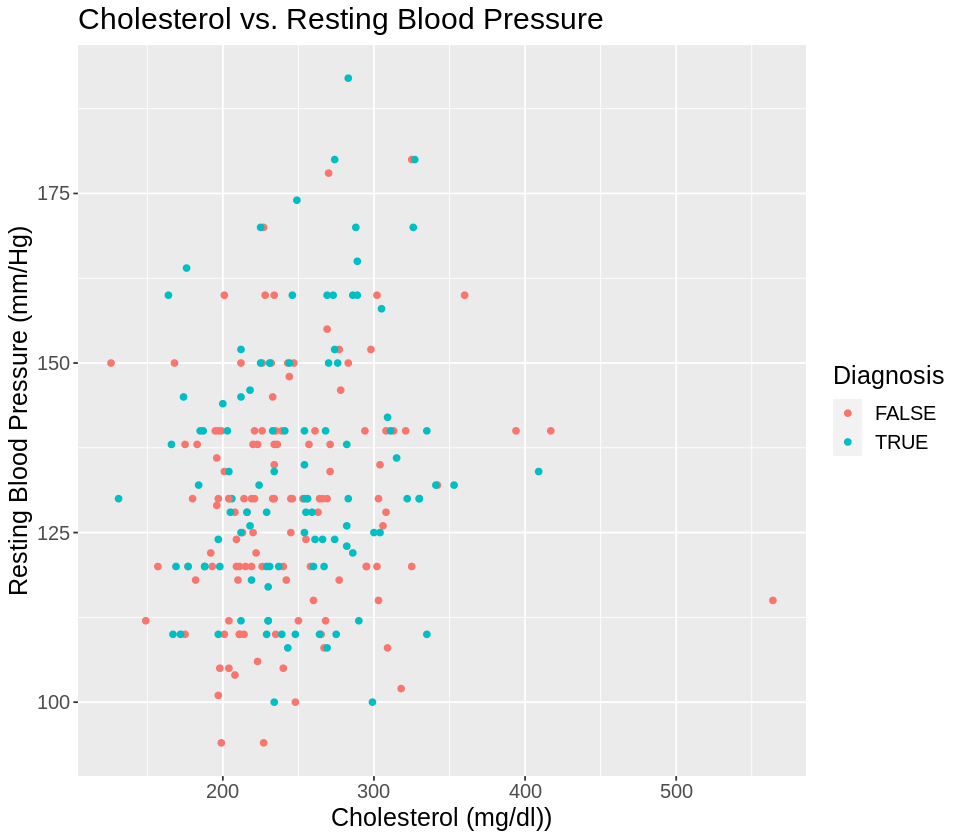

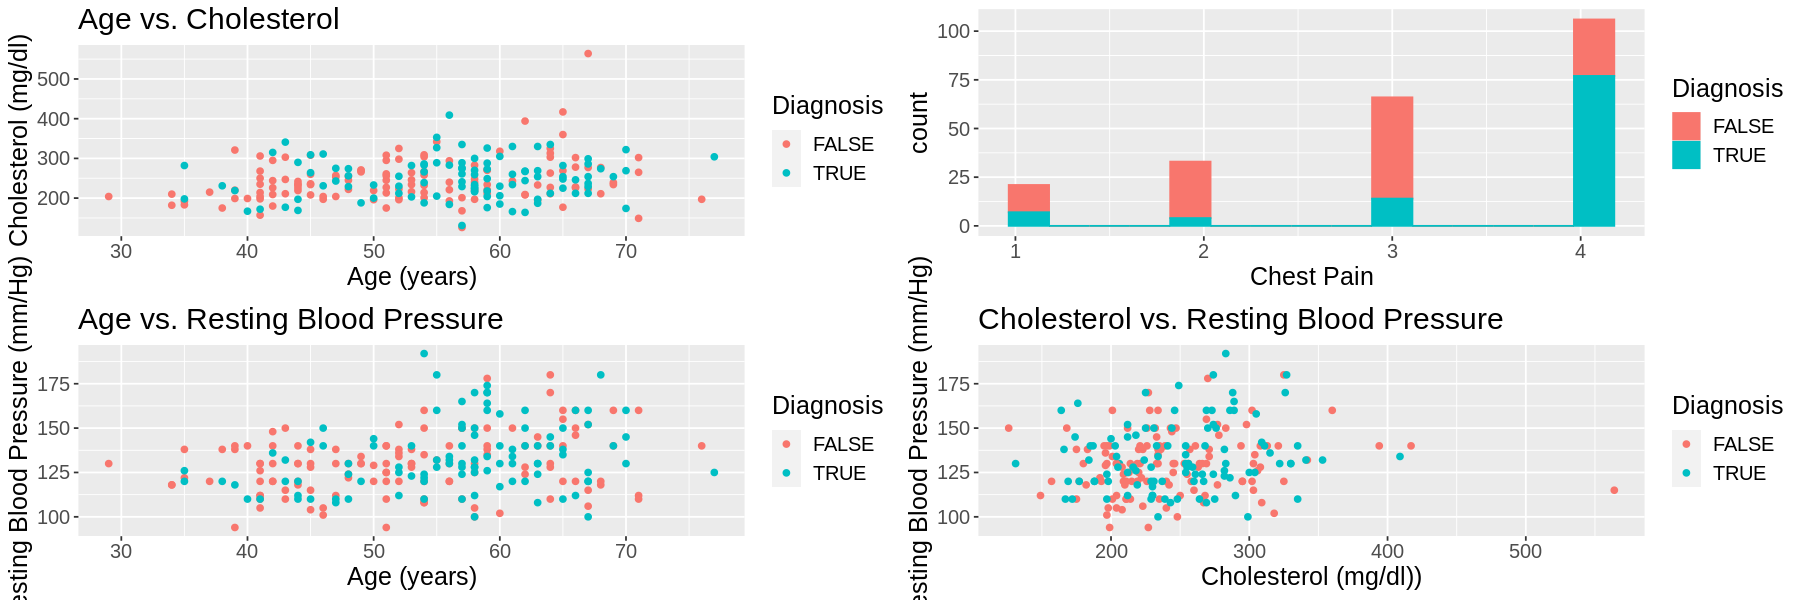

In [11]:
#Plotting this data to find correlation of diagnosis
options(repr.plot.width = 8, repr.plot.height = 7)

graph <- ggplot(heart_training, aes(x = age, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "Cholesterol (mg/dl)", color = "Diagnosis", title = "Age vs. Cholesterol") +
                 theme(text = element_text(size = 15))

graph2 <- ggplot(heart_training, aes(x = cp, color = diag, fill = diag)) +
                 geom_histogram(bins = 15) +
                 labs(x = "Chest Pain", color = "Diagnosis", fill = "Diagnosis") +
                 theme(text = element_text(size = 15))

graph3 <- ggplot(heart_training, aes(x = age, y = trestbps, color = diag)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "Resting Blood Pressure (mm/Hg)", color = "Diagnosis", title = "Age vs. Resting Blood Pressure") +
                 theme(text = element_text(size = 15))

graph4 <- ggplot(heart_training, aes(x = chol, y = trestbps, color = diag)) +
                 geom_point() +
                 labs(x = "Cholesterol (mg/dl))", y = "Resting Blood Pressure (mm/Hg)", color = "Diagnosis", title = "Cholesterol vs. Resting Blood Pressure") +
                 theme(text = element_text(size = 15))

graph
graph2
graph3
graph4
options(repr.plot.width = 15, repr.plot.height = 5)
plot_grid(graph, graph2, graph3, graph4)

_Figure 5, 6, 7, 8, respectively_

In Figure 5 there are two clear groups where the majority of those younger and with lower cholesteral had no heart disease and those who are older and greater cholesteral were mainly diagnosed with heart disease. This grouping is consistent with Figures 6, 7, and 8 that all had a positive correlation between their respective values and heart disease. Graphing it out this way allows us to understand the summarized values as well as notice any outliers in the data.

# Expected Outcomes and Significance
Considering our variables, we expect to find those who are older, have high cholesterol levels, high blood pressure, and experience atypical or typical chest pain to have the highest chance of having heart disease. With heart disease being the second leading cause of death after cancer, it is essential that we know the factors that impact our heart’s health so we can prevent complications in the future. Using what we find in our model, we can help identify who has heart disease and treat them faster. This could lead to future questions such as how can we better prevent heart disease early in age? What factors result in heart disease for young people? Lastly, what is the greatest cause for heart disease?


# EVERYTHING BELOW IS UPDATED AFTER LAST CLASS, THIS IS CODE FOR OUR TESTING KNN

Now that we have proven the best k value for our classification, we do the same steps of creating a specification and workflow, only using the value for neighbors we selected. 

In [ ]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

cancer_fit <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = cancer_train)

In [ ]:
Then we can use predict() with our fit workflow and testing dataset to predict the classifications 

In [ ]:
# Get the prediction column
cancer_predictions <- predict(cancer_fit, cancer_test) |> 
    bind_cols(cancer_test)
cancer_predictions

In [ ]:
We then compare the accuracy of predictions to the true values in the test set

In [ ]:

cancer_acc <- cancer_predictions |> 
    metrics(truth = Classes, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
cancer_acc

In [ ]:
Finally, compare the predictions to the true values in a confusion matrix

In [ ]:

cancer_cm <- cancer_predictions |> 
    conf_mat(truth = Classes, estimate = .pred_class)

cancer_cm

In [ ]:
(description)